In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error as mse
import operator

import math
import keras
import pandas as pd 
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import regularizers


def load_data():

    animals_data = np.genfromtxt('data_lab2/animals.dat', delimiter=',')
    animals_data.shape = (32, 84)

    animal_names = np.genfromtxt('data_lab2/animalnames.txt', dtype='str')

    for i in range(len(animal_names)):

        animal_names[i] = animal_names[i].replace("'","")

    return animals_data, animal_names



class SOM():
    def __init__(self, nodes):
        self.nodes = np.random.rand(nodes[0],nodes[1])
        self.num_nodes = nodes[0]
    
    def similarity(self, x, nodes):
        min_dist = 99999
        min_idx = 0
        for row in range(self.num_nodes):
            sim = np.linalg.norm(x - nodes[row])
            if (sim < min_dist):
                min_dist = sim
                min_idx = row
        return min_idx, min_dist
    
    def update_weights(self, x, eta, i):
        self.nodes[i] = self.nodes[i] + eta*(x - self.nodes[i])
        
    def update_neighboors(self, x, winner_idx, nbhd_size, eta, circular = False):
       
        for i in range(max(0,winner_idx-nbhd_size),min(winner_idx+nbhd_size,self.num_nodes)):
                self.update_weights(x,eta,i)
                
        if circular == True:
            print("asfg")
                

    def train(self, X, labels, nbhd_size, n_epochs, eta, circular = False):
        
        for epoch in range(n_epochs):
            for i in range(len(X)):
                min_idx, min_dist = self.similarity(X[i,:],self.nodes)
                self.update_neighboors(X[i,:],min_idx,math.floor(nbhd_size),eta,circular)
            nbhd_size = nbhd_size - nbhd_size/n_epochs
                
        results = dict()
        for i in range(len(X)):
            min_idx, min_dist = self.similarity(X[i,:],self.nodes)
            results[labels[i]] = min_idx
            #print(labels[i],"is represented best by node:",min_idx)
                    
        return results
        
    
    
data, names = load_data()
network = SOM([100,84])

results = network.train(data,names,50,20,eta=0.2)

print(sorted(results.items(), key=operator.itemgetter(1)))


[('camel', 0), ('giraffe', 0), ('pig', 2), ('horse', 3), ('antelop', 6), ('kangaroo', 8), ('rabbit', 9), ('rat', 12), ('elephant', 15), ('bat', 17), ('skunk', 20), ('ape', 24), ('cat', 27), ('lion', 27), ('dog', 33), ('hyena', 36), ('bear', 38), ('walrus', 43), ('crocodile', 48), ('seaturtle', 52), ('frog', 56), ('ostrich', 61), ('penguin', 64), ('duck', 70), ('pelican', 73), ('spider', 81), ('beetle', 86), ('grasshopper', 87), ('dragonfly', 90), ('moskito', 93), ('butterfly', 98), ('housefly', 99)]


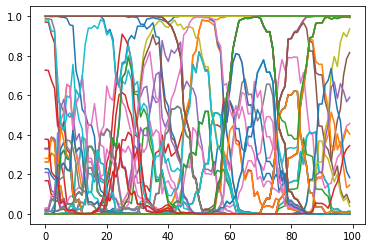

In [22]:
plt.plot(network.nodes)